In [1]:
import pandas as pd             #for dataframe Manupulatiom
import matplotlib.pyplot as plt # for plot and visualizatinon
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler  # for dataset  encoding and scaling
from sklearn.model_selection import train_test_split #for splitting train set and test set
from sklearn.linear_model import LinearRegression    # for model training
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  # for evaluating the performance of the model

In [2]:
# load the dataset
data = pd.read_csv("/content/sample_data/Assignment_1_Dataset.csv")

In [3]:
# See what the dataset contained (first five rows)
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
#Display last five rows
data.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


In [5]:
# Display the detail of  the dataframe ( Datatype ,column, and row)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
# Analyze the startistical view of numerical data
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [7]:
#Checking Missing Values
data.isna().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [8]:
#Apply onehot encoding for unique data point
Data_encoded = pd.get_dummies(data, drop_first=True)

In [9]:
Data_encoded

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,7,99,9,1,91.0,True
1,4,82,4,2,65.0,False
2,8,51,7,2,45.0,True
3,5,52,5,2,36.0,True
4,7,75,8,5,66.0,False
...,...,...,...,...,...,...
9995,1,49,4,2,23.0,True
9996,7,64,8,5,58.0,True
9997,6,83,8,5,74.0,True
9998,9,97,7,0,95.0,True


In [10]:
# split input and output features
X = Data_encoded.drop(columns = ['Performance Index'])
Y = Data_encoded[['Performance Index']]

In [11]:
# see the input feature
X

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_Yes
0,7,99,9,1,True
1,4,82,4,2,False
2,8,51,7,2,True
3,5,52,5,2,True
4,7,75,8,5,False
...,...,...,...,...,...
9995,1,49,4,2,True
9996,7,64,8,5,True
9997,6,83,8,5,True
9998,9,97,7,0,True


In [12]:
# Split train set to be 80%  and test set 20%
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2)

In [13]:
X_test

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_Yes
2966,2,66,7,5,True
4103,5,70,7,8,True
1909,2,68,7,6,True
9131,9,40,5,8,False
6916,2,63,9,4,False
...,...,...,...,...,...
8868,6,63,4,8,True
8558,7,40,8,2,True
8414,3,60,4,6,True
8587,1,80,6,3,False


In [14]:
# Feature Scaling
Scaler_x = StandardScaler()
X_train_scaled = Scaler_x.fit_transform(X_test)
X_test_scaled = Scaler_x.transform(X_test)

#Scalar_y = StandardScaler()
#Y_train_scaled = Scalar_y.fit_transform(Y_train)
#Y_test_scaled = Scalar_y.transform(Y_test)


In [15]:
# train the model
LR=LinearRegression()
LR.fit(X_train,Y_train)

predicted=LR.predict(X_test)

In [16]:
#Make Prediction
predicted=LR.predict(X_test)
predicted

array([[43.79612937],
       [57.02559388],
       [46.03209276],
       ...,
       [39.29148095],
       [53.70613327],
       [40.48421208]])

In [19]:
#Evaluating model Performance

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(Y_test, predicted)
print(f"r2: {r2}")

mse = mean_squared_error(Y_test, predicted)
print(f"Mean Squared Error: {mse}")

mae = mean_absolute_error(Y_test, predicted)
print(f"Mean Absolute Error: {mae}")


r2: 0.9884423921652353
Mean Squared Error: 4.285866912120724
Mean Absolute Error: 1.6458726105630597


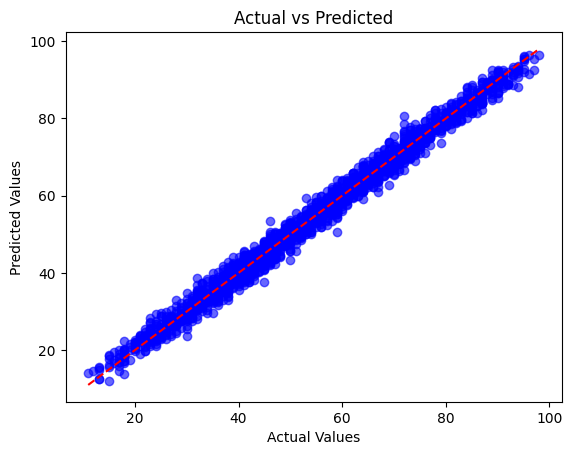

In [21]:
# plot the actual vs Predicted by model
import matplotlib.pyplot as plt
import numpy as np

# Ensure both are numpy arrays
y_true = np.array(Y_test)
y_pred = np.array(predicted)

plt.scatter(y_true, y_pred, color='blue', alpha=0.6)

# Get the limits for the line
min_val = min(y_true.min(), y_pred.min())
max_val = max(y_true.max(), y_pred.max())

# Plot 45-degree reference line
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()
